# **Assignment 2**, **dataset 2**


# Problem statement



### Loading the dataset

The PlantVillage dataset contains 54,304 images. The images span 14 crop species: Apple, Blueberry, Cherry, Corn, Grape, Orange, Peach, Bell Pepper, Potato, Raspberry, Soybean, Squash, Strawberry, Tomato. In containes images of 17 fungal diseases, 4 bacterial diseases, 2 mold (oomycete) diseases, 2 viral disease, and 1 disease caused by a mite. 12 crop species also have images of healthy leaves that are not visibly affected by a disease.

https://arxiv.org/pdf/1511.08060

https://github.com/gabrieldgf4/PlantVillage-Dataset

For this assignment, you will make a model that predicts whether an potato leaf comes from a healthy or unhealthy plant (binary classification). The healthy apple leaf images are in the `Potato___healthy` folder, while unhealthy apple leaf images are in `Potato___Early_blight` and `Potato___Late_blight`. You are allowed to use a pretrained model that you transfer to this problem, if you whish so. Keep in mind that the dataset is highly unbalanced (152 vs 1000 vs 1000) so make sure to augment the dataset to account for that.

In [1]:
!git clone https://github.com/gabrieldgf4/PlantVillage-Dataset.git


Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 54511, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 54511 (delta 36), reused 0 (delta 0), pack-reused 54403 (from 1)
Receiving objects: 100% (54511/54511), 806.27 MiB | 2.57 MiB/s, done.
Resolving deltas: 100% (50/50), done.
Updating files: 100% (54306/54306), done.


In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from torchvision import datasets, io
from torchvision.transforms import ToTensor, transforms
from torch.utils.data import DataLoader
from torchvision import models

In [3]:
dataset_path = 'PlantVillage-Dataset/'
healthy_potato_path = os.path.join(dataset_path, 'Potato___Healthy')
early_blight_path = os.path.join(dataset_path, 'Potato___Early_blight')
late_blight_path = os.path.join(dataset_path, 'Potato___Late_blight')

In [4]:
datapath_category = {'Potato___Healthy': 'healthy', 'Potato___Early_blight': "unhealthy", 'Potato___Late_blight': "unhealthy"}

def load_data(dir_path):

    result_df = pd.DataFrame(columns=['image', 'label'])

    for category, label in datapath_category.items():
        current_path = os.path.join(dir_path, category)

        images = os.listdir(current_path)
        number_of_images = len(images)

        current_df = pd.DataFrame({
            'image': [os.path.join(current_path, img) for img in images],
            'label': [label] * number_of_images
        })

        result_df = pd.concat([result_df, current_df], ignore_index=True)

    return result_df

potatoes = load_data(dataset_path)

potatoes.head()

,image,label
0,PlantVillage-Dataset/Potato___Healthy/bf2bffbb...,healthy
1,PlantVillage-Dataset/Potato___Healthy/61b05f0a...,healthy
2,PlantVillage-Dataset/Potato___Healthy/31a09d39...,healthy
3,PlantVillage-Dataset/Potato___Healthy/413bc2e9...,healthy
4,PlantVillage-Dataset/Potato___Healthy/f66af6c0...,healthy


## **Exploratory Data Analysis**

The student will have to make a written analysis of the data being loaded (depending on the dataset that was assigned to them). They should apply methods of inspecting the data and make some exploratory data analysis

### Information about the dataset

In [8]:
dataset_length = len(potatoes)
category_sum = potatoes['label'].value_counts()

print(f"Total number of images in the dataset: {dataset_length}")
print("Number of images per category:")
print(category_sum)
print()
print(f"Image shape: {io.read_image(potatoes['image'][0]).shape}")

Total number of images in the dataset: 2152
Number of images per category:
label
unhealthy    2000
healthy       152
Name: count, dtype: int64

Image shape: torch.Size([3, 256, 256])


### Show images of potato leaves

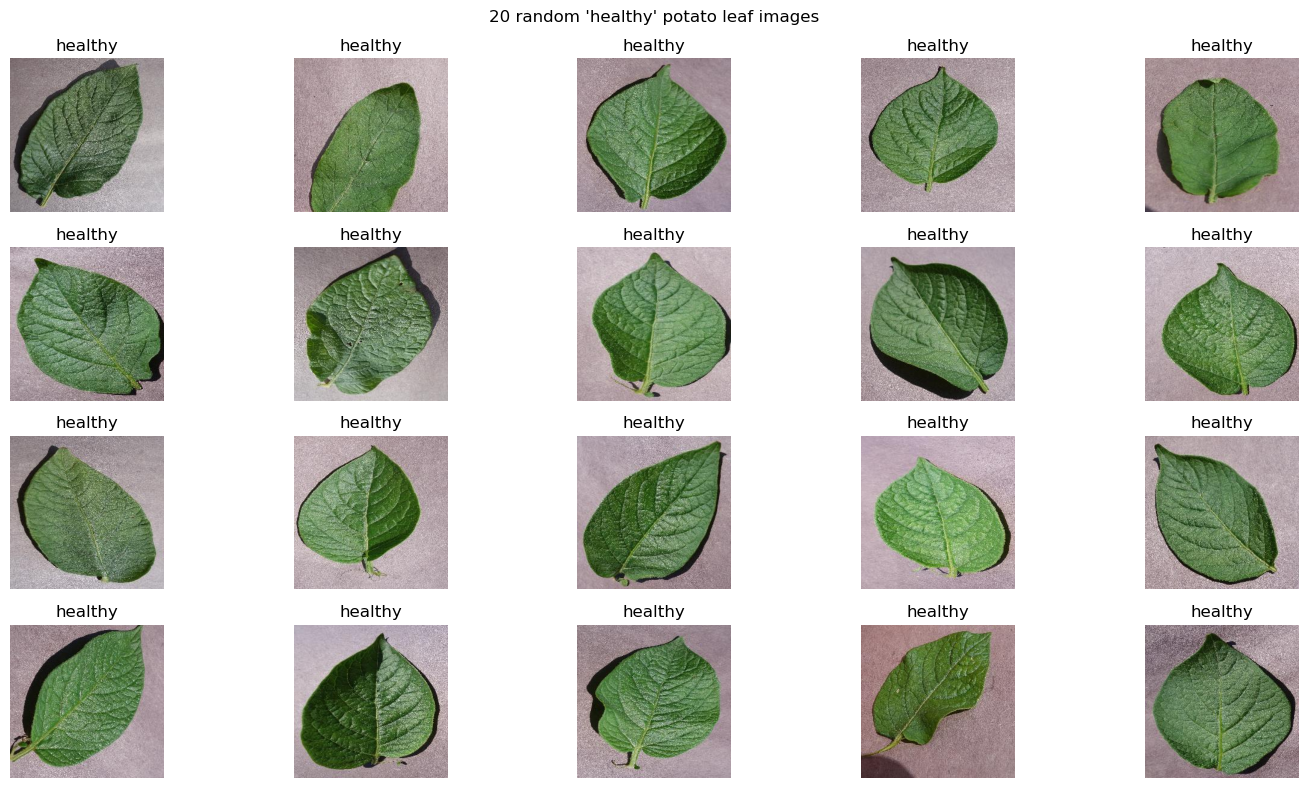

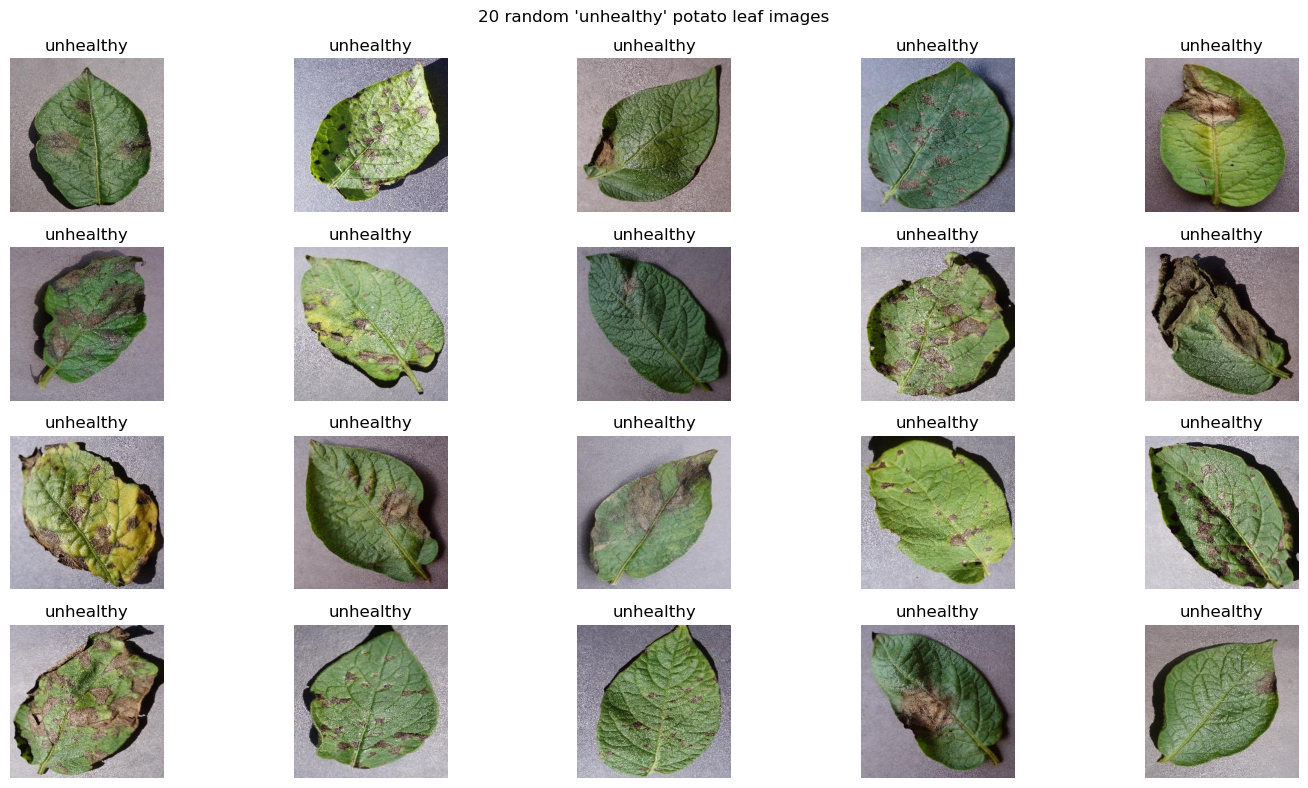

In [10]:
import random

def plot_potato_images(df, class_label, n=20):
    # Filter dataframe for the class
    class_df = df[df['label'] == class_label]
    # Randomly sample n images
    sample_df = class_df.sample(n=min(n, len(class_df)), random_state=42)
    
    plt.figure(figsize=(15, 8))
    for i, img_path in enumerate(sample_df['image']):
        img = io.read_image(img_path)
        # Convert to HWC for matplotlib
        img = img.permute(1, 2, 0).numpy()
        plt.subplot(4, 5, i+1)
        plt.imshow(img.astype('uint8'))
        plt.axis('off')
        plt.title(class_label)
    plt.suptitle(f"{n} random '{class_label}' potato leaf images")
    plt.tight_layout()
    plt.show()

# Plot 20 healthy and 20 unhealthy potato images
plot_potato_images(potatoes, 'healthy', n=20)
plot_potato_images(potatoes, 'unhealthy', n=20)

## **Data Preprocessing**:

If applicable, the student will create new features from existing data to improve model performance and/or select the most relevant features for the model.

## **Data Transformation**

The student should prepare the data for the training. Augmenting, splitting, and otherwise transforming should be done here.

## **Model Selection**


The student should implement a simple model as a baseline to compare more complex models. The student should try more complex modes and justify their rejection or acceptance.

## **Reporting the results**

The student should report the results. Identify which features are most influential in the model’s predictions, if applicable for the dataset and model used.

**Extra**: Any additional discussion and extra work relevant for solving the problem is welcome by the student and will contribute to a better grade.